In [7]:
# Matrix power 2x2, O(log n)
def mat_mul(A, B):
    return [
        [A[0][0]*B[0][0] + A[0][1]*B[1][0],
         A[0][0]*B[0][1] + A[0][1]*B[1][1]],
        [A[1][0]*B[0][0] + A[1][1]*B[1][0],
         A[1][0]*B[0][1] + A[1][1]*B[1][1]],
    ]

def mat_pow(M, n):
    R = [[1,0],[0,1]]  # I2
    while n > 0:
        if n & 1:
            R = mat_mul(R, M)
        M = mat_mul(M, M)
        n >>= 1
    return R

def fib_matrix(n: int) -> int:
    if n == 0:
        return 0
    M = [[1,1],[1,0]]
    P = mat_pow(M, n)
    return P[1][0]  # F_n

# B) Fast-doubling, O(log n) 
def fib_pair(n: int) -> tuple[int,int]:
    if n == 0:
        return (0, 1)
    a, b = fib_pair(n >> 1)            # F_k, F_{k+1}
    c = a * (2*b - a)                  # F_{2k}
    d = a*a + b*b                      # F_{2k+1}
    if n & 1:
        return (d, c + d)              # F_{2k+1}, F_{2k}+F_{2k+1}
    else:
        return (c, d)                  # F_{2k},   F_{2k+1}

def fib_fast(n: int) -> int:
    return fib_pair(n)[0]

# Example
for n in [0,1,2,5,10,50,100]:
    print(n, fib_matrix(n), fib_fast(n))

    


0 0 0
1 1 1
2 1 1
5 5 5
10 55 55
50 12586269025 12586269025
100 354224848179261915075 354224848179261915075


The time complexity is O(log2n)(or simply O(logn))because the algorithm repeatedly divides the problem size by 2 instead of decreasing it by 1.Thats why it is exponentially faster than the naive O(n) Fibonacci computation

In [4]:
from typing import List, Tuple

def knapsack_01(values: List[int], weights: List[int], W: int) -> Tuple[int, List[int]]:
    
   
    n = len(values)
    # dp[i][w] = best value using first i items with capacity w
    dp = [[0] * (W + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        wi, vi = weights[i - 1], values[i - 1]
        for w in range(W + 1):
            # Case 1: do not take item i
            dp[i][w] = dp[i - 1][w]
            # Case 2: take item i (if it fits)
            if wi <= w:
                dp[i][w] = max(dp[i][w], dp[i - 1][w - wi] + vi)

    # Reconstruct chosen items
    res_value = dp[n][W]
    picked = []
    w = W
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i - 1][w]:  # item i-1 was taken
            picked.append(i - 1)
            w -= weights[i - 1]
    picked.reverse()
    return res_value, picked


def knapsack_01_optimized(values: List[int], weights: List[int], W: int) -> int:
    
    # 0/1 Knapsack with memory optimization: O(n*W) time and O(W) space.
    
    n = len(values)
    dp = [0] * (W + 1)

    for i in range(n):
        wi, vi = weights[i], values[i]
        # Iterate backward to avoid using the same item more than once
        for w in range(W, wi - 1, -1):
            dp[w] = max(dp[w], dp[w - wi] + vi)
    return dp[W]



# Example usage 

if __name__ == "__main__":
    values  = [12, 20, 15, 30]
    weights = [2, 3, 4, 5]
    W = 8

    best, picked = knapsack_01(values, weights, W)
    print("Classic DP:")
    print("Max value:", best)         
    print("Picked indices:", picked)  

    best_opt = knapsack_01_optimized(values, weights, W)
    print("\nOptimized O(W) DP:")
    print("Max value:", best_opt)     


Classic DP:
Max value: 50
Picked indices: [1, 3]

Optimized O(W) DP:
Max value: 50


Why is Knapsack not a Greedy Algorithm? Why Dynamic Programming?

A greedy algorithm ( taking items by highest value-to-weight ratio) fails for the 0/1 Knapsack problem
because it makes local choices that may not lead to the global optimum. 

If capacity (W = 50):

Greedy picks item 1 + 2  value = 160
Optimal is item 2 + 3 value = 220
Because each item can only be taken or not taken (0/1), greedy strategies can miss the best combination.

Therefore, we use Dynamic Programming (DP).

Generated 100 random binary vectors of length 200.

--- Pairwise Similarities (N=200) ---
Cosine   mean=0.4961  std=0.0450  min=0.3337  max=0.6434
Jaccard  mean=0.3304  std=0.0398  min=0.2000  max=0.4726
Hamming  mean=0.5003  std=0.0353  min=0.3850  max=0.6250


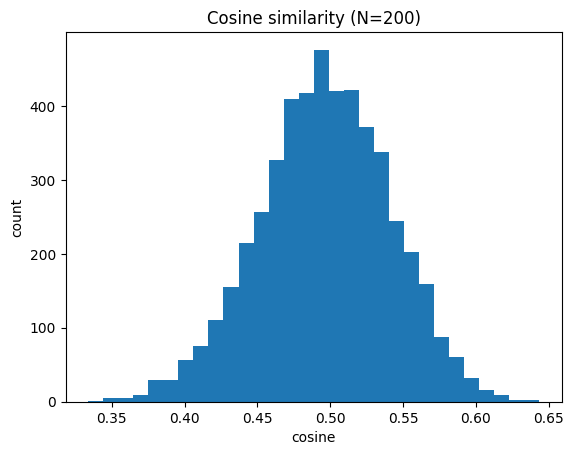

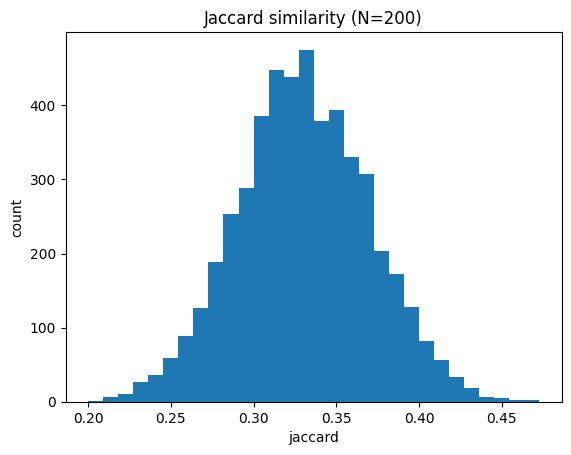

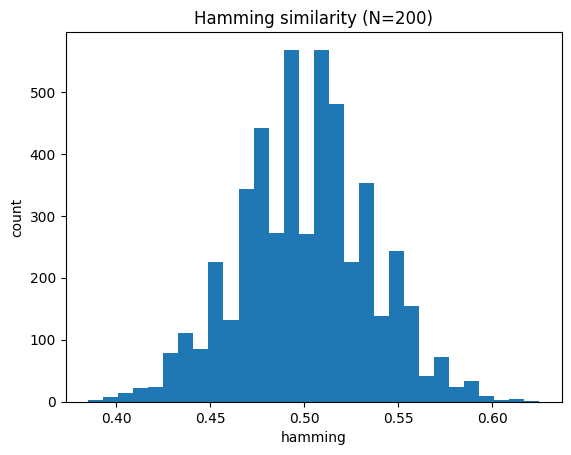


Expectation for p=0.5:
  E[cosine] ≈ 0.5
  E[jaccard] ≈ 1/3
  E[hamming] ≈ 0.5
As N increases, variance decreases (Law of Large Numbers / CLT) → distributions look Gaussian.


--- Similarity statistics vs. N ---


,N,cos_mean,cos_std,jac_mean,jac_std,ham_mean,ham_std
0,50,0.499777,0.089639,0.335223,0.079464,0.501265,0.071146
1,100,0.496674,0.064855,0.331415,0.057247,0.499358,0.049661
2,200,0.496135,0.045022,0.330445,0.039802,0.500254,0.035331
3,500,0.498894,0.028046,0.332579,0.024891,0.499733,0.022415
4,1000,0.500575,0.020555,0.333954,0.018280,0.499763,0.015945



Observation:
  As N increases, standard deviations shrink.
  This means similarity values become more concentrated around their means.


Number of binary vectors with exactly 5 ones (N=2000): 265,335,665,000,400
Information content ≈ 47.91 bits

Capacity concepts:
1) Counting capacity — total distinct sparse patterns = C(N, w).
2) Discriminative capacity — number of patterns storable with required separation
   (limited by sphere-packing in Hamming space).
More separation (larger distance threshold) → smaller usable capacity.



In [6]:
#  Problem 3 — Neuro Computing (Random Binary Vectors & Similarity)



import numpy as np
import matplotlib.pyplot as plt
import math
from itertools import combinations
import pandas as pd

# Generate random binary vectors 
def random_binary_matrix(M: int, N: int, p: float = 0.5, seed: int = 0) -> np.ndarray:
    rng = np.random.default_rng(seed)
    return (rng.random((M, N)) < p).astype(int)

M, N, p = 100, 200, 0.5
X = random_binary_matrix(M, N, p)
print(f"Generated {M} random binary vectors of length {N}.")

# Similarity functions
def cosine_sim(x, y):
    num = np.dot(x, y)
    den = np.sqrt(x.sum()) * np.sqrt(y.sum())
    return (num / den) if den > 0 else 0.0

def jaccard_sim(x, y):
    inter = np.sum((x == 1) & (y == 1))
    union = np.sum((x == 1) | (y == 1))
    return (inter / union) if union > 0 else 0.0

def hamming_sim(x, y):
    return np.mean(x == y)

# Compute pairwise similarities
cos_vals, jac_vals, ham_vals = [], [], []
for i, j in combinations(range(M), 2):
    x, y = X[i], X[j]
    cos_vals.append(cosine_sim(x, y))
    jac_vals.append(jaccard_sim(x, y))
    ham_vals.append(hamming_sim(x, y))

cos_vals, jac_vals, ham_vals = map(np.array, (cos_vals, jac_vals, ham_vals))

# Display statistics 
def summarize(name, arr):
    print(f"{name:8s} mean={arr.mean():.4f}  std={arr.std(ddof=1):.4f}  min={arr.min():.4f}  max={arr.max():.4f}")

print("\n--- Pairwise Similarities (N=200) ---")
summarize("Cosine", cos_vals)
summarize("Jaccard", jac_vals)
summarize("Hamming", ham_vals)

# Plot histograms
plt.figure()
plt.hist(cos_vals, bins=30)
plt.title("Cosine similarity (N=200)")
plt.xlabel("cosine"); plt.ylabel("count")
plt.show()

plt.figure()
plt.hist(jac_vals, bins=30)
plt.title("Jaccard similarity (N=200)")
plt.xlabel("jaccard"); plt.ylabel("count")
plt.show()

plt.figure()
plt.hist(ham_vals, bins=30)
plt.title("Hamming similarity (N=200)")
plt.xlabel("hamming"); plt.ylabel("count")
plt.show()

print("""
Expectation for p=0.5:
  E[cosine] ≈ 0.5
  E[jaccard] ≈ 1/3
  E[hamming] ≈ 0.5
As N increases, variance decreases (Law of Large Numbers / CLT) → distributions look Gaussian.
""")

# Repeat for larger N
def run_for_multiple_N(N_list, M=100, p=0.5, seed=0):
    results = []
    for N in N_list:
        X = random_binary_matrix(M, N, p, seed)
        cos_vals, jac_vals, ham_vals = [], [], []
        for i, j in combinations(range(M), 2):
            x, y = X[i], X[j]
            cos_vals.append(cosine_sim(x, y))
            jac_vals.append(jaccard_sim(x, y))
            ham_vals.append(hamming_sim(x, y))
        results.append({
            "N": N,
            "cos_mean": np.mean(cos_vals), "cos_std": np.std(cos_vals, ddof=1),
            "jac_mean": np.mean(jac_vals), "jac_std": np.std(jac_vals, ddof=1),
            "ham_mean": np.mean(ham_vals), "ham_std": np.std(ham_vals, ddof=1)
        })
    return pd.DataFrame(results)

df = run_for_multiple_N([50, 100, 200, 500, 1000])
print("\n--- Similarity statistics vs. N ---")
display(df)

print("""
Observation:
  As N increases, standard deviations shrink.
  This means similarity values become more concentrated around their means.
""")

# Sparse vectors (N=2000, w=5) 
N, w = 2000, 5
count = math.comb(N, w)
bits = math.log2(count)
print(f"\nNumber of binary vectors with exactly {w} ones (N=2000): {count:,}")
print(f"Information content ≈ {bits:.2f} bits")

print("""
Capacity concepts:
1) Counting capacity — total distinct sparse patterns = C(N, w).
2) Discriminative capacity — number of patterns storable with required separation
   (limited by sphere-packing in Hamming space).
More separation (larger distance threshold) → smaller usable capacity.
""")
